<a href="https://colab.research.google.com/github/JINJA-E/rep4DL/blob/main/5%EC%9E%A5_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images_with_noise_channels.shape)
print(train_images_with_zeros_channels.shape)

(60000, 1568)
(60000, 1568)


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 21ms/step - loss: 0.6121 - accuracy: 0.8139 - val_loss: 0.2487 - val_accuracy: 0.9287
Epoch 2/10
375/375 [==============================] - 6s 17ms/step - loss: 0.2510 - accuracy: 0.9235 - val_loss: 0.2024 - val_accuracy: 0.9366
Epoch 3/10
375/375 [==============================] - 6s 17ms/step - loss: 0.1636 - accuracy: 0.9485 - val_loss: 0.1526 - val_accuracy: 0.9550
Epoch 4/10
375/375 [==============================] - 6s 17ms/step - loss: 0.1162 - accuracy: 0.9633 - val_loss: 0.1439 - val_accuracy: 0.9574
Epoch 5/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0868 - accuracy: 0.9733 - val_loss: 0.1185 - val_accuracy: 0.9668
Epoch 6/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0635 - accuracy: 0.9803 - val_loss: 0.1145 - val_accuracy: 0.9686
Epoch 7/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0487 - accuracy: 0.9844 - val_loss: 0.1256 - val_accuracy: 0.9665

In [ ]:
model = get_model()
history_original = model.fit(train_images, train_labels, epochs=10, batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.2839 - accuracy: 0.9171 - val_loss: 0.1509 - val_accuracy: 0.9571
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1194 - accuracy: 0.9641 - val_loss: 0.1074 - val_accuracy: 0.9688
Epoch 3/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0784 - accuracy: 0.9767 - val_loss: 0.0932 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0566 - accuracy: 0.9831 - val_loss: 0.0860 - val_accuracy: 0.9751
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0420 - accuracy: 0.9876 - val_loss: 0.0842 - val_accuracy: 0.9765
Epoch 6/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0314 - accuracy: 0.9907 - val_loss: 0.0757 - val_accuracy: 0.9793
Epoch 7/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0239 - accuracy: 0.9931 - val_loss: 0.0825 - val_accuracy: 0.9773

**Plotting a validation accuracy comparison**

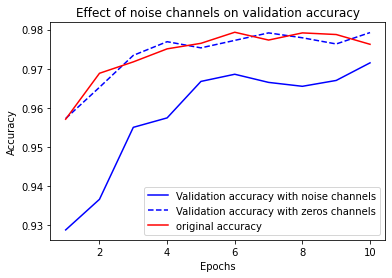

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_origin = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs,val_acc_origin, "r",label = 'original accuracy')
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

지금 결과를 보시면, noise채널은 bad performance.그러니까 noise추가하지말자 뭐 이런 뜻인가봐..

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 11ms/step - loss: 2.3180 - accuracy: 0.1039 - val_loss: 2.3051 - val_accuracy: 0.1085
Epoch 2/100
375/375 [==============================] - 4s 11ms/step - loss: 2.3008 - accuracy: 0.1146 - val_loss: 2.3120 - val_accuracy: 0.1013
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2911 - accuracy: 0.1272 - val_loss: 2.3163 - val_accuracy: 0.1007
Epoch 4/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2776 - accuracy: 0.1410 - val_loss: 2.3260 - val_accuracy: 0.1025
Epoch 5/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2611 - accuracy: 0.1546 - val_loss: 2.3331 - val_accuracy: 0.1002
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2401 - accuracy: 0.1663 - val_loss: 2.3545 - val_accuracy: 0.1013
Epoch 7/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2150 - accuracy: 0.1831 - val_loss: 2.3685 - val_accuracy:

#### The manifold hypothesis

높은 차원에 존재하는 데이터들의 경우, 실제로는 해당 데이터들을 아우르는 낮은 차원의 다양체manifold 역시 존재한다는 매니폴드 가설manifold hypothesis
[출처] 차원, 벡터, Embedding|작성자 dayspring



많은 차원 축소 알고리즘이 훈련 샘플이 놓여 있는 매니폴드를 모델링 하는 식으로 작동한다. 이를 매니폴드 학습(Manifold Learning)이라고 한다. "대부분의 실제  고차원 데이터 셋이 더 낮은 저차원 매니폴드에 가깝게 놓여있다"라는 매니폴드 가정(manifold assumption) 또는 매니폴드 가설(manifold hypothesis)에 근거한다.

MNIST 데이터 셋의 경우 모든 픽셀이 연관되어 있지 않고 대부분 선으로 연결되어 있고 경계는 흰색이고 어느 정도 중앙에 있다. 즉, 극히 일부분의 변화가 판별하는 데 영향을 준다. 이러한 내용은 데이터 셋을 저차원의 매니폴드로 압축할 수 있도록 도와준다. 다시 말해 높은 차원에 존재하는 데이터들의 경우, 실제로는 해당 데이터들을 아우르는 낮은 차원의 다양체 manifold 역시 존재한다는 뜻이다.
[출처] 차원 축소|작성자 Avengineers

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

In [ ]:
num_validation_samples =10000
np.random.shuffle(data)

validation_data = data[:num_validation_samples]
training_data = data[num_validation_samples:]
model = get_model()
model.fit(training_data)
validation_score = model.evaluate(validation_data...)

...

model = get_model()
model.fit(np.concatenate([training_data,validation_data]), ....)
test_score = model.evaluate(test_data . ....)

#### K-fold validation

In [ ]:
k = 3
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []

for fold in range(k):
  validation_data = data...

#### Iterated K-fold validation with shuffling

적은 데이터로 할 때 최대한 정확하게하기위해 사용

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

three probelmes!

1) training loss doesn't go down
2) model doesn't generalize
3) training and validation loss both go down but model underfitting

### Tuning key gradient descent parameters

* 이건 learning rate의 문제

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),#too large
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), #good
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")]) #too simple
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 2.3289 - accuracy: 0.1000 - val_loss: 2.3181 - val_accuracy: 0.1062
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3117 - accuracy: 0.1081 - val_loss: 2.3191 - val_accuracy: 0.1051
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3069 - accuracy: 0.1127 - val_loss: 2.3178 - val_accuracy: 0.1015
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1191 - val_loss: 2.3277 - val_accuracy: 0.0982
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2990 - accuracy: 0.1230 - val_loss: 2.3242 - val_accuracy: 0.1013
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2968 - accuracy: 0.1225 - val_loss: 2.3224 - val_accuracy: 0.1034
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2948 - accuracy: 0.1255 - val_loss: 2.3232 - val_accuracy: 0.1064
Epoch 

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"), #층도 유닛도 늘려버려
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

In [ ]:
#generaliztion power와 overfit을 확인했다면 일반화를 시킬차례

### Dataset curation

### Feature engineering

good features allow you to solve probelms using lower resourses

### Using early stopping

### Regularizing your model

* Overfitting을 막기위한 노력

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5436 - accuracy: 0.7754 - val_loss: 0.4212 - val_accuracy: 0.8553
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3403 - accuracy: 0.9009 - val_loss: 0.3203 - val_accuracy: 0.8922
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2471 - accuracy: 0.9245 - val_loss: 0.3075 - val_accuracy: 0.8788
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1938 - accuracy: 0.9395 - val_loss: 0.2746 - val_accuracy: 0.8918
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1590 - accuracy: 0.9503 - val_loss: 0.2782 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1284 - accuracy: 0.9625 - val_loss: 0.2996 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1092 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6167 - accuracy: 0.6646 - val_loss: 0.5626 - val_accuracy: 0.7843
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5197 - accuracy: 0.8045 - val_loss: 0.5177 - val_accuracy: 0.8266
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4731 - accuracy: 0.8597 - val_loss: 0.4935 - val_accuracy: 0.8540
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4399 - accuracy: 0.8901 - val_loss: 0.4785 - val_accuracy: 0.8624
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4138 - accuracy: 0.9133 - val_loss: 0.4698 - val_accuracy: 0.8681
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3926 - accuracy: 0.9283 - val_loss: 0.4749 - val_accuracy: 0.8542
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3739 - accuracy: 0.9399 - val_loss: 0.4625 - val_accuracy: 0.8710
Epoch 8/20
30

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 9s 278ms/step - loss: 0.5480 - accuracy: 0.7565 - val_loss: 0.3218 - val_accuracy: 0.8820
Epoch 2/20
30/30 [==============================] - 8s 265ms/step - loss: 0.2412 - accuracy: 0.9075 - val_loss: 0.4254 - val_accuracy: 0.8256
Epoch 3/20
30/30 [==============================] - 8s 265ms/step - loss: 0.1672 - accuracy: 0.9388 - val_loss: 0.2924 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 8s 267ms/step - loss: 0.0702 - accuracy: 0.9760 - val_loss: 0.7793 - val_accuracy: 0.7923
Epoch 5/20
30/30 [==============================] - 8s 265ms/step - loss: 0.0651 - accuracy: 0.9789 - val_loss: 0.4553 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 8s 266ms/step - loss: 0.1638 - accuracy: 0.9766 - val_loss: 0.3673 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 8s 279ms/step - loss: 0.0039 - accuracy: 0.9999 - val_loss: 0.5025 - val_accuracy: 0.8876
Epoch 

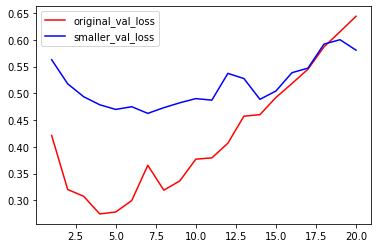

In [ ]:
import matplotlib.pyplot as plt

val_loss1 = history_original.history['val_loss']
val_loss2 = history_smaller_model.history['val_loss']
val_loss3 = history_larger_model.history['val_loss']

epochs = range(1,21)

plt.plot(epochs,val_loss1,'r',label = 'original_val_loss')
plt.plot(epochs,val_loss2,'b',label = 'smaller_val_loss')
plt.legend()
plt.show()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5928 - accuracy: 0.7817 - val_loss: 0.4791 - val_accuracy: 0.8299
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3924 - accuracy: 0.8938 - val_loss: 0.3945 - val_accuracy: 0.8800
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3324 - accuracy: 0.9133 - val_loss: 0.3679 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2982 - accuracy: 0.9260 - val_loss: 0.3696 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2813 - accuracy: 0.9327 - val_loss: 0.3741 - val_accuracy: 0.8813
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2684 - accuracy: 0.9380 - val_loss: 0.3622 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2595 - accuracy: 0.9403 - val_loss: 0.3646 - val_accuracy: 0.8847
Epoch 8/20
30

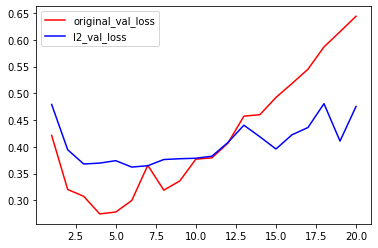

In [ ]:
val_loss4 = history_l2_reg.history['val_loss']

epochs = range(1,21)

plt.plot(epochs,val_loss1,'r',label = 'original_val_loss')
plt.plot(epochs,val_loss4,'b',label = 'l2_val_loss')
plt.legend()
plt.show()

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.6409 - accuracy: 0.6253 - val_loss: 0.5492 - val_accuracy: 0.8057
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5369 - accuracy: 0.7356 - val_loss: 0.4470 - val_accuracy: 0.8746
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.4562 - accuracy: 0.7999 - val_loss: 0.3689 - val_accuracy: 0.8808
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3958 - accuracy: 0.8356 - val_loss: 0.3258 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3408 - accuracy: 0.8719 - val_loss: 0.2933 - val_accuracy: 0.8921
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2991 - accuracy: 0.8898 - val_loss: 0.2814 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2706 - accuracy: 0.9035 - val_loss: 0.2838 - val_accuracy: 0.8898
Epoch 8/20
30

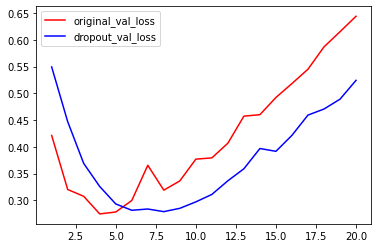

In [ ]:
val_loss5 = history_dropout.history['val_loss']

epochs = range(1,21)

plt.plot(epochs,val_loss1,'r',label = 'original_val_loss')
plt.plot(epochs,val_loss5,'b',label = 'dropout_val_loss')
plt.legend()
plt.show()

## Summary